In [2]:
using DrWatson
@quickactivate "Doran_etal_2022"
using SPI
using NewickTreeTools
using StatsPlots
using Muon

In [3]:
fractionalvariance(S) = S.^2 ./ sum(S.^2)

fractionalvariance (generic function with 1 method)

In [5]:
uniprot = readh5ad(joinpath(datadir(), "exp_pro", "UP7047", "2020_02_UP7047.h5ad"))
usv = SVD(uniprot.obsm["LSVs"][:,:], uniprot.uns["SVs"][:], uniprot.varm["RSVs"][:,:]');


In [12]:
uniprotfastafiles = "https://ftp.uniprot.org/pub/databases/uniprot/knowledgebase/reference_proteomes/Bacteria/" .* 
    uniprot.obs.proteomeID .* "/" .* uniprot.obs.proteomeID .* "_" .* string.(uniprot.obs.TaxID) .* ".fasta.gz"

open(joinpath(projectdir(), "_research", "uniprotIDS.txt"), "w") do io
    for id in uniprot.obs.proteomeID
        println(io, id)
    end
end

In [11]:
sum(fractionalvariance(usv.S)[1:10])

0.7809874897893229

In [35]:
fv = fractionalvariance(usv.S)

7047-element Vector{Float64}:
 0.5155354386274686
 0.07595279467013291
 0.05337036589579239
 0.043348784138771385
 0.024394619819993826
 0.019041075530514807
 0.014042211514131885
 0.013544378659218934
 0.010975319499256984
 0.010782501434040992
 ⋮
 2.951695770361969e-9
 2.896252463223123e-9
 2.6156524565399444e-9
 2.5370317669300334e-9
 2.4506801038482693e-9
 2.3447713264177354e-9
 2.2409385777330034e-9
 2.022568084744206e-9
 1.5548821439007552e-9

In [39]:
sum(fv[2800:5800])
# sum(fv[2800:7047])

0.0018461042917807297

In [13]:
spitreesubset = [
    "UP000018018"
    "UP000018068"
    "UP000018372"
    "UP000018098"
    "UP000017916"
    "UP000018121"
    "UP000195527"
    "UP000018392"
    "UP000279562"
    "UP000008630"
    "UP000319088"
    "UP000056419"
    "UP000262405"
    "UP000018228"
    "UP000018150"
    "UP000018063"
];

In [16]:
smalluniprot = uniprot[spitreesubset, :]

AnnData object 16 ✕ 10177

In [18]:
smallusv = SVD(smalluniprot.obsm["LSVs"][:,:], uniprot.uns["SVs"][:], smalluniprot.varm["RSVs"][:,:]');

In [21]:
using Combinatorics: combinations

In [24]:
using Statistics

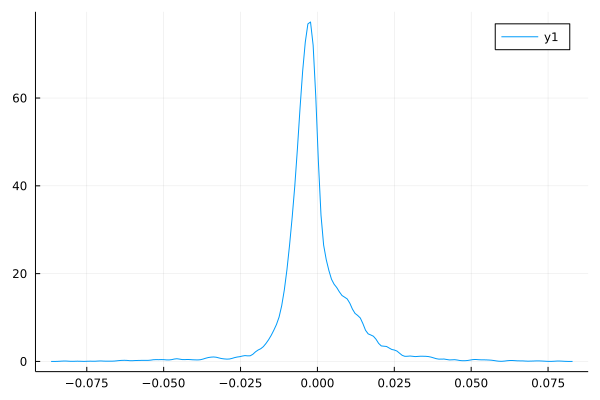

In [83]:
density(usv.U[:,5])

In [61]:
uniprot.obs.Phylum |> unique

53-element Vector{String}:
 "Bacteroidetes"
 "Proteobacteria"
 "Tenericutes"
 "Actinobacteria"
 "Firmicutes"
 "Cyanobacteria"
 "Verrucomicrobia"
 "Planctomycetes"
 "Chlamydiae"
 "Chlorobi"
 ⋮
 "Lentisphaerae"
 "Candidatus Parcubacteria"
 "Candidatus Cloacimonetes"
 "Ignavibacteriae"
 "Candidatus Atribacteria"
 "Candidatus Poribacteria"
 "candidate division Zixibacteria"
 "Abditibacteriota"
 "Dictyoglomi"

In [92]:
open(joinpath(projectdir(), "_research", "uniprotIDS.txt"), "w") do io
    for v in uniprot.obs_names.vals; println(io, v); end
end


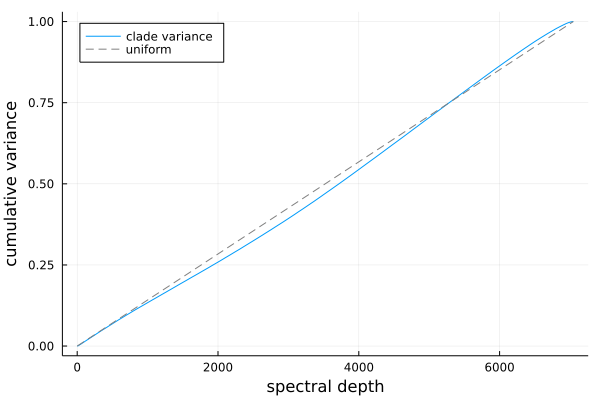

In [88]:
plot(cumsum(mapslices(var, usv.U[uniprot.obs.Phylum .== "Bacteroidetes", :], dims=1)[:]), 
    # title="cum. var. 16 taxa near B. stercoris",
    xlabel="spectral depth",
    ylabel="cumulative variance",
    label="clade variance",
    legend=:topleft)
plot!((1:7047)./7047, c=:grey, linestyle=:dash, label="uniform")

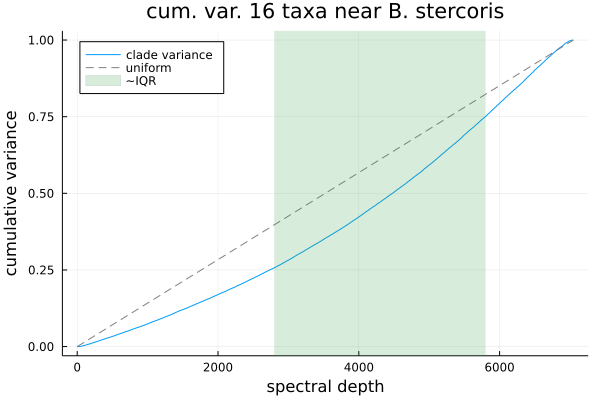

In [46]:
plot(cumsum(mapslices(var, smallusv.U, dims=1)[:]), 
    title="cum. var. 16 taxa near B. stercoris",
    xlabel="spectral depth",
    ylabel="cumulative variance",
    label="clade variance",
    legend=:topleft)
plot!((1:7047)./7047, c=:grey, linestyle=:dash, label="uniform")
vspan!([2800, 5800], label="~IQR", alpha=.2)

In [2]:
# tiplabels = string.([:A, :B, :C, :D, :E])
dij = calc_spi_mtx(rand(100,50))
hc = hclust(dij, linkage=:average, branchorder=:optimal);

In [3]:
SPI.nwstr(hc);
NewickTree.nwstr(newick(hc));
@time SPI.nwstr(hc);
@time NewickTree.nwstr(newick(hc));

  0.000079 seconds (1.10 k allocations: 174.859 KiB)
  0.000455 seconds (4.88 k allocations: 539.500 KiB)


In [4]:
# tiplabels = string.([:A, :B, :C, :D, :E])
dij = calc_spi_mtx(rand(20000,50))
hc = hclust(dij, linkage=:average, branchorder=:optimal);

In [7]:
SPI.nwstr(hc);
NewickTree.nwstr(newick(hc));
@time SPI.nwstr(hc);
@time NewickTree.nwstr(newick(hc));

  0.021892 seconds (220.00 k allocations: 51.007 MiB, 18.02% gc time)
  0.179651 seconds (983.57 k allocations: 147.336 MiB, 24.87% gc time)
